In [59]:
import numpy as np
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pylab as plt

In [36]:
lat = np.linspace(-90., 90, 180)
lon = np.linspace(0., 360, 360)

xx, yy = np.meshgrid(lon, lat)
data = np.sin(xx*np.pi/180.) * np.cos(yy*np.pi/180.)

da = xr.DataArray(data, coords=[lat, lon], \
                  dims=['latitude', 'longitude'], name='foo')

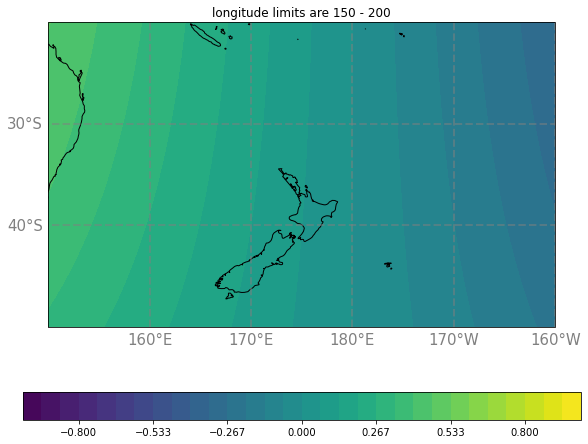

In [74]:
fig = plt.figure(figsize=(10, 8)) 

proj = ccrs.PlateCarree(central_longitude=180)

ax = plt.subplot(1,1,1,projection=proj)

ax.set_extent([150, 200, -50, -20], crs=ccrs.PlateCarree())
ax.coastlines()
cs = plt.contourf(xx,yy,data, transform = ccrs.PlateCarree(), levels = np.linspace(-1,1,31))

plt.colorbar(orientation = 'horizontal')
plt.title('longitude limits are 150 - 200')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = True
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-150,160,170,180,-170,-160])
gl.ylocator = mticker.FixedLocator([-20,-30,-40,-50])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'size': 15, 'color': 'gray'}

plt.show();